<b><h3 align="center">Contemporary Belgian Travelogues</h3><br>

This project is a part of the analysis I did for my internship at KBR, Royal Library of Belgium, as part of the BESOCIAL project and supported via the Digital Research Lab. The BESOCIAL project aims to develop a sustainable social media archiving and preservation strategy in Belgium. 
Dataset that is used has been acquired from Insagram by the help of Pieter Heyvaert, a BESOCIAL team member and development lead, and developer advocate at IDLab at Ghent University. Pieter stated that the most effective tool for collecting the required data would be Instaloader, which is a tool used to harvest pictures and or videos, as well as their captions and other metadata from Instagram. 
During the internship process I focused on the transformation and evolution of the notion of travelogue: how the concept of travelogue has changed from its traditional, mostly text-based form with the introduction of the internet and social media, to one that is enriched with more creative visual tools such as photos and videos, that appeal to a larger and more diverse audience, that allows for instant interaction between the travel blogger and the audience, and that supports a much more subjective and intimate narrative than an authoritative and distant one, making it much easier to establish a connection between this vastly increased audience and the travelogue owner. 
Following the definition, I identified a content selection strategy that ended up hashtags being one of the identifier elements for travelogues on Instagram. Two of the hashtags that I listed; "#belgiantravelblogger" and "#travelbelgium" were used to harvest the data using Instaloader.   
The analysis of the dataset consists of two parts: identifying, categorizing, and annotating hashtag lists via .txt files, and cleaning and editing the metadata of the posts stored in the .json files. At the same time, the caption column of the dataframe are briefly analyzed in the context of the emojis they contain. 

In [1]:
import glob
from bs4 import BeautifulSoup
import re
import operator
import json
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import advertools as adv
from langdetect import detect
from collections import namedtuple, Counter

<b>.txt Files Anaalysis</b>  

In [2]:
# general function that converts list of tuples to dictionary
def Convert (tup, di):
    for a, b in tup:
        di.setdefault (a, []).append(b)
    return di

<b>.txt Files Analysis for #belgiantravelblogger</b>

In [3]:
#belgiantravelbloggerTXT

btb_hashtags_dict = {} #create an empty dictionary for belgiantravelblogger hashtags
for filename in glob.glob ("#belgiantravelblogger/*.txt"): 
    with open (filename, encoding="utf8") as f: #open belgiantravelblogger txt files
        btb = BeautifulSoup (f.read ()) #read belgiantravelblogger txt files
        btb_hashtags = re.findall(r'#\S+', str(btb)) #belgiantravelblogger hashtags
        for hashtag in btb_hashtags: #dictionary of belgiantravelblogger hashtags
            if hashtag not in btb_hashtags_dict: #if the hashtag is not in the dictionary yet, count as 1
                btb_hashtags_dict [hashtag] = 1 #[hashtag] is the key
            else:
                btb_hashtags_dict [hashtag] += 1 #if the hashtag is already in the distionary, add one more value to the already existing key
        #print (hashtag)
        #print (btb_hashtags) #list of belgiantravelblogger hashtags

C:\Users\Nisa\anaconda3\envs\geo_pandas\lib\site-packages\bs4\__init__.py:435: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  warnings.warn(


In [4]:
print (btb_hashtags_dict)

{'#travelinspiration': 11, '#travelingram': 7, '#traveltheworld': 24, '#traveladdict': 34, '#travelphotography': 13, '#travelgirl': 14, '#travelaroundtheworld': 3, '#belgiantraveller': 64, '#belgianphotography': 8, '#belgiangirl': 35, '#belgiantravelblogger': 199, '#belgianadventures': 1, '#belgianlife': 1, '#photography': 3, '#colmar': 1, '#france': 5, '#vosges': 1, '#vosgestourisme': 1, '#francetourisme': 1, '#mickaelkors': 1, '#weekendvibes': 1, '#positivevibes': 2, '#happylife': 3, '#belgianblogger': 94, '#blogger_be': 3, '#horseriding': 1, '#paardrijdenmetplezier': 1, '#paardrijden': 1, '#belgiumtravel': 2, '#explorebelgium': 1, '#lifechoices': 1, '#travelblogger': 53, '#belgiumtrip': 4, '#thailand': 24, '#thailandia': 27, '#trekking': 6, '#paiadventures': 3, '#marche': 3, '#trekkingthailand': 3, '#maehongsong': 3, '#citation': 4, '#worldtour': 27, '#voyageurdumonde': 27, '#travel': 57, '#lifeofadventure': 27, '#backpacking': 29, '#belgiantraveller#belgiumblogger': 27, '#blogueuse

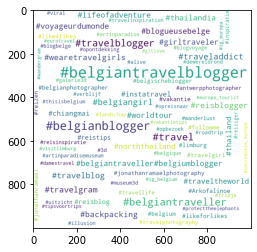

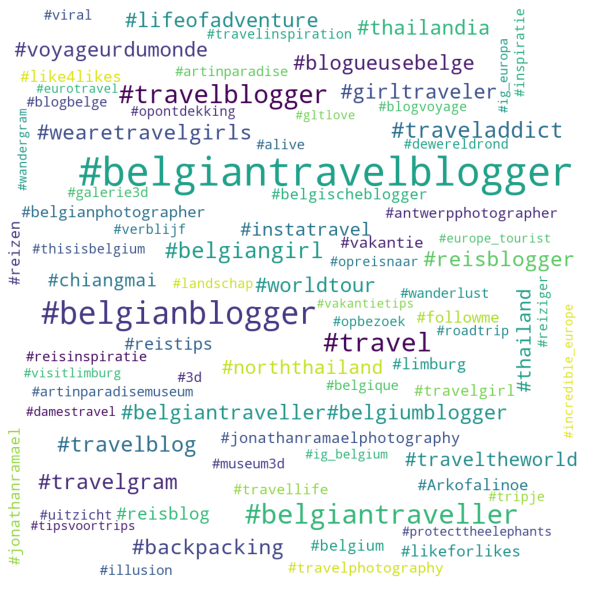

In [5]:
wc_btb = WordCloud(background_color="white",width=1000,height=1000, max_words=80,relative_scaling=0.4,normalize_plurals=False).generate_from_frequencies(btb_hashtags_dict)
plt.imshow(wc_btb)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc_btb)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [6]:
#create a list with tuples for belgiantravelblogger hashtags after counted: to sort them according to count
#make a function that will sort all the hashtags by value and is going to be a list with tuples
    
btb_hashtags_tuple_sorted = sorted (btb_hashtags_dict. items (), key = operator.itemgetter (1), reverse=True)

In [7]:
print (btb_hashtags_tuple_sorted)

[('#belgiantravelblogger', 199), ('#belgianblogger', 94), ('#belgiantraveller', 64), ('#travel', 57), ('#travelblogger', 53), ('#belgiangirl', 35), ('#traveladdict', 34), ('#travelblog', 32), ('#travelgram', 31), ('#backpacking', 29), ('#wearetravelgirls', 29), ('#reisblogger', 29), ('#thailandia', 27), ('#worldtour', 27), ('#voyageurdumonde', 27), ('#lifeofadventure', 27), ('#belgiantraveller#belgiumblogger', 27), ('#blogueusebelge', 27), ('#girltraveler', 27), ('#traveltheworld', 24), ('#thailand', 24), ('#norththailand', 24), ('#instatravel', 22), ('#chiangmai', 21), ('#reisblog', 20), ('#reistips', 18), ('#like4likes', 15), ('#likeforlikes', 15), ('#followme', 15), ('#Arkofalinoe', 15), ('#belgianphotographer', 15), ('#vakantie', 15), ('#limburg', 15), ('#travelgirl', 14), ('#jonathanramael', 14), ('#jonathanramaelphotography', 14), ('#reizen', 14), ('#belgischeblogger', 14), ('#belgium', 14), ('#travelphotography', 13), ('#antwerpphotographer', 13), ('#travellife', 13), ('#alive',

In [8]:
#convert the list with tuples above to a dictionary

btb_hashtags_dict_sorted = {}
Convert (btb_hashtags_tuple_sorted, btb_hashtags_dict_sorted)

{'#belgiantravelblogger': [199],
 '#belgianblogger': [94],
 '#belgiantraveller': [64],
 '#travel': [57],
 '#travelblogger': [53],
 '#belgiangirl': [35],
 '#traveladdict': [34],
 '#travelblog': [32],
 '#travelgram': [31],
 '#backpacking': [29],
 '#wearetravelgirls': [29],
 '#reisblogger': [29],
 '#thailandia': [27],
 '#worldtour': [27],
 '#voyageurdumonde': [27],
 '#lifeofadventure': [27],
 '#belgiantraveller#belgiumblogger': [27],
 '#blogueusebelge': [27],
 '#girltraveler': [27],
 '#traveltheworld': [24],
 '#thailand': [24],
 '#norththailand': [24],
 '#instatravel': [22],
 '#chiangmai': [21],
 '#reisblog': [20],
 '#reistips': [18],
 '#like4likes': [15],
 '#likeforlikes': [15],
 '#followme': [15],
 '#Arkofalinoe': [15],
 '#belgianphotographer': [15],
 '#vakantie': [15],
 '#limburg': [15],
 '#travelgirl': [14],
 '#jonathanramael': [14],
 '#jonathanramaelphotography': [14],
 '#reizen': [14],
 '#belgischeblogger': [14],
 '#belgium': [14],
 '#travelphotography': [13],
 '#antwerpphotographer

In [9]:
print (btb_hashtags_dict_sorted)

{'#belgiantravelblogger': [199], '#belgianblogger': [94], '#belgiantraveller': [64], '#travel': [57], '#travelblogger': [53], '#belgiangirl': [35], '#traveladdict': [34], '#travelblog': [32], '#travelgram': [31], '#backpacking': [29], '#wearetravelgirls': [29], '#reisblogger': [29], '#thailandia': [27], '#worldtour': [27], '#voyageurdumonde': [27], '#lifeofadventure': [27], '#belgiantraveller#belgiumblogger': [27], '#blogueusebelge': [27], '#girltraveler': [27], '#traveltheworld': [24], '#thailand': [24], '#norththailand': [24], '#instatravel': [22], '#chiangmai': [21], '#reisblog': [20], '#reistips': [18], '#like4likes': [15], '#likeforlikes': [15], '#followme': [15], '#Arkofalinoe': [15], '#belgianphotographer': [15], '#vakantie': [15], '#limburg': [15], '#travelgirl': [14], '#jonathanramael': [14], '#jonathanramaelphotography': [14], '#reizen': [14], '#belgischeblogger': [14], '#belgium': [14], '#travelphotography': [13], '#antwerpphotographer': [13], '#travellife': [13], '#alive': 

In [10]:
#END RESULT OF HASHTAG LISTING. MAYBE YOU CAN 1) MERGE THEM WITH TRAVELBELGIUM HASHTAGS 2) FIND THE COMMON HASHTAGS
for key,value in btb_hashtags_dict_sorted.items ():
    print (key,value)

#belgiantravelblogger [199]
#belgianblogger [94]
#belgiantraveller [64]
#travel [57]
#travelblogger [53]
#belgiangirl [35]
#traveladdict [34]
#travelblog [32]
#travelgram [31]
#backpacking [29]
#wearetravelgirls [29]
#reisblogger [29]
#thailandia [27]
#worldtour [27]
#voyageurdumonde [27]
#lifeofadventure [27]
#belgiantraveller#belgiumblogger [27]
#blogueusebelge [27]
#girltraveler [27]
#traveltheworld [24]
#thailand [24]
#norththailand [24]
#instatravel [22]
#chiangmai [21]
#reisblog [20]
#reistips [18]
#like4likes [15]
#likeforlikes [15]
#followme [15]
#Arkofalinoe [15]
#belgianphotographer [15]
#vakantie [15]
#limburg [15]
#travelgirl [14]
#jonathanramael [14]
#jonathanramaelphotography [14]
#reizen [14]
#belgischeblogger [14]
#belgium [14]
#travelphotography [13]
#antwerpphotographer [13]
#travellife [13]
#alive [12]
#reisinspiratie [12]
#wanderlust [12]
#artinparadisemuseum [12]
#artinparadise [12]
#illusion [12]
#3d [12]
#museum3d [12]
#galerie3d [12]
#viral [12]
#blogbelge [12]


<b>.txt Files Analysis for #travelbelgium</b> 

In [11]:
#travelbelgiumTXT

tb_hashtags_dict = {} #create an empty dictionary for travelbelgium hashtags
for filename in glob.glob ("#travelbelgium/*.txt"): 
    with open (filename, encoding="utf8") as f: #open travelbelgium txt files
        tb = BeautifulSoup (f.read ()) #read travelbelgium txt files
        tb_hashtags = re.findall(r'#\S+', str(tb)) #travelbelgium hashtags
        for hashtag in tb_hashtags: #dictionary of travelbelgium hashtags
            if hashtag not in tb_hashtags_dict: #if the hashtag is not in the dictionary yet, count as 1
                tb_hashtags_dict [hashtag] = 1 #[hashtag] is the key
            else:
                tb_hashtags_dict [hashtag] += 1 #if the hashtag is already in the distionary, add one more value to the already existing key
        #print (hashtag)
        #print (btb_hashtags) #list of travelbelgium hashtags

In [12]:
print (tb_hashtags_dict)

{'#brussel': 14, '#belgië': 2, '#ig_belgium': 7, '#loving_belgium': 11, '#bxlmabelle': 2, '#europe_vacations': 2, '#houses_phototrip': 1, '#springinbrussels': 1, '#flowersinthecity': 1, '#travelphotography': 30, '#bruxellestagram': 1, '#visitbelgium': 53, '#facadesofbuildings': 1, '#seemybrussels': 1, '#blogtravel': 1, '#bxlove': 2, '#thisisbelgium': 13, '#travel_capture': 1, '#brusselscity': 2, '#chasingfacades': 1, '#chasing_facades': 1, '#bruxelles🇧🇪': 1, '#instabelgium': 18, '#igbelgium': 11, '#travelbelgium': 71, '#belgium_unite': 2, '#super_belgium': 2, '#besteuropepics': 1, '#igersbelgium': 9, '#ilovemycity': 1, '#beach': 1, '#beachlife': 1, '#belgium': 53, '#belgique': 51, '#flandre': 2, '#explorebelgium': 3, '#merdunord': 1, '#beautifulbelgium': 1, '#belgianshooters': 1, '#instatravel': 4, '#belgiumphotography': 3, '#sunsetphotography': 1, '#belgianphotographer': 3, '#sunsetlovers': 1, '#wanderlust': 2, '#sunsetlandscape': 1, '#Canon': 2, '#1D': 2, '#50mm': 2, '#brusselscentra

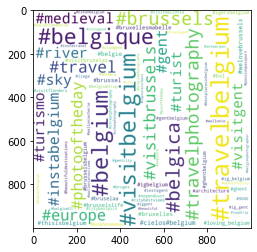

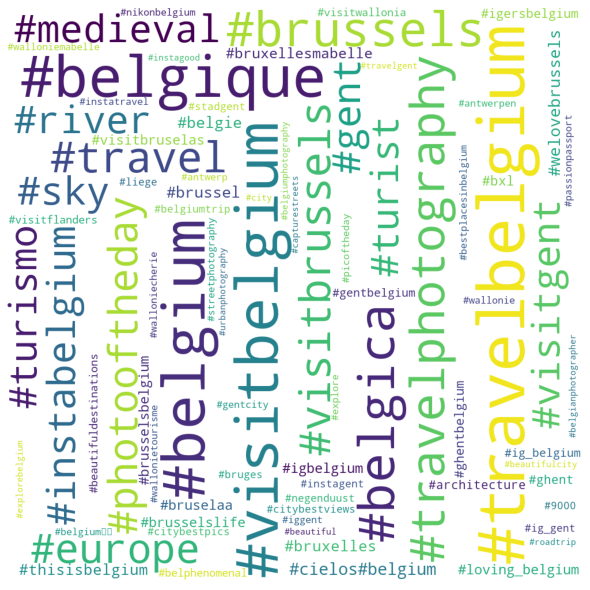

In [13]:
wc_tb = WordCloud(background_color="white",width=1000,height=1000, max_words=80,relative_scaling=0.4,normalize_plurals=False).generate_from_frequencies(tb_hashtags_dict)
plt.imshow(wc_tb)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wc_tb)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [14]:
#create a list with tuples for travelbelgium hashtags after counted: to sort them according to count
#make a function that will sort all the hashtags by value and is going to be a list with tuples
    
tb_hashtags_tuple_sorted = sorted (tb_hashtags_dict. items (), key = operator.itemgetter (1), reverse=True)

In [15]:
print (tb_hashtags_tuple_sorted)

[('#travelbelgium', 71), ('#visitbelgium', 53), ('#belgium', 53), ('#belgique', 51), ('#belgica', 34), ('#brussels', 31), ('#travelphotography', 30), ('#visitbrussels', 23), ('#travel', 23), ('#photooftheday', 20), ('#europe', 20), ('#instabelgium', 18), ('#gent', 18), ('#sky', 18), ('#visitgent', 17), ('#medieval', 17), ('#river', 17), ('#turismo', 17), ('#turist', 17), ('#cielos#belgium', 17), ('#welovebrussels', 16), ('#brussel', 14), ('#belgie', 14), ('#thisisbelgium', 13), ('#bruxelles', 13), ('#bruxellesmabelle', 12), ('#loving_belgium', 11), ('#igbelgium', 11), ('#brusselslife', 11), ('#visitbruselas', 11), ('#bruselaa', 11), ('#brusselsbelgium', 11), ('#bxl', 10), ('#igersbelgium', 9), ('#ghentbelgium', 9), ('#ghent', 8), ('#architecture', 8), ('#ig_belgium', 7), ('#gentbelgium', 7), ('#belphenomenal', 6), ('#visitwallonia', 6), ('#visitflanders', 6), ('#beautifuldestinations', 6), ('#bruges', 5), ('#stadgent', 5), ('#instagent', 5), ('#9000', 5), ('#negenduust', 5), ('#ig_gent

In [16]:
#convert the list with tuples above to a dictionary

tb_hashtags_dict_sorted = {}
Convert (tb_hashtags_tuple_sorted, tb_hashtags_dict_sorted)

{'#travelbelgium': [71],
 '#visitbelgium': [53],
 '#belgium': [53],
 '#belgique': [51],
 '#belgica': [34],
 '#brussels': [31],
 '#travelphotography': [30],
 '#visitbrussels': [23],
 '#travel': [23],
 '#photooftheday': [20],
 '#europe': [20],
 '#instabelgium': [18],
 '#gent': [18],
 '#sky': [18],
 '#visitgent': [17],
 '#medieval': [17],
 '#river': [17],
 '#turismo': [17],
 '#turist': [17],
 '#cielos#belgium': [17],
 '#welovebrussels': [16],
 '#brussel': [14],
 '#belgie': [14],
 '#thisisbelgium': [13],
 '#bruxelles': [13],
 '#bruxellesmabelle': [12],
 '#loving_belgium': [11],
 '#igbelgium': [11],
 '#brusselslife': [11],
 '#visitbruselas': [11],
 '#bruselaa': [11],
 '#brusselsbelgium': [11],
 '#bxl': [10],
 '#igersbelgium': [9],
 '#ghentbelgium': [9],
 '#ghent': [8],
 '#architecture': [8],
 '#ig_belgium': [7],
 '#gentbelgium': [7],
 '#belphenomenal': [6],
 '#visitwallonia': [6],
 '#visitflanders': [6],
 '#beautifuldestinations': [6],
 '#bruges': [5],
 '#stadgent': [5],
 '#instagent': [5],

In [17]:
print (tb_hashtags_dict_sorted)

{'#travelbelgium': [71], '#visitbelgium': [53], '#belgium': [53], '#belgique': [51], '#belgica': [34], '#brussels': [31], '#travelphotography': [30], '#visitbrussels': [23], '#travel': [23], '#photooftheday': [20], '#europe': [20], '#instabelgium': [18], '#gent': [18], '#sky': [18], '#visitgent': [17], '#medieval': [17], '#river': [17], '#turismo': [17], '#turist': [17], '#cielos#belgium': [17], '#welovebrussels': [16], '#brussel': [14], '#belgie': [14], '#thisisbelgium': [13], '#bruxelles': [13], '#bruxellesmabelle': [12], '#loving_belgium': [11], '#igbelgium': [11], '#brusselslife': [11], '#visitbruselas': [11], '#bruselaa': [11], '#brusselsbelgium': [11], '#bxl': [10], '#igersbelgium': [9], '#ghentbelgium': [9], '#ghent': [8], '#architecture': [8], '#ig_belgium': [7], '#gentbelgium': [7], '#belphenomenal': [6], '#visitwallonia': [6], '#visitflanders': [6], '#beautifuldestinations': [6], '#bruges': [5], '#stadgent': [5], '#instagent': [5], '#9000': [5], '#negenduust': [5], '#ig_gent'

In [18]:
#END RESULT OF HASHTAG LISTING. MAYBE YOU CAN 1) MERGE THEM WITH BELGIUMTRAVELBLOGGER HASHTAGS 2) FIND THE COMMON HASHTAGS
for key,value in tb_hashtags_dict_sorted.items ():
    print (key,value)

#travelbelgium [71]
#visitbelgium [53]
#belgium [53]
#belgique [51]
#belgica [34]
#brussels [31]
#travelphotography [30]
#visitbrussels [23]
#travel [23]
#photooftheday [20]
#europe [20]
#instabelgium [18]
#gent [18]
#sky [18]
#visitgent [17]
#medieval [17]
#river [17]
#turismo [17]
#turist [17]
#cielos#belgium [17]
#welovebrussels [16]
#brussel [14]
#belgie [14]
#thisisbelgium [13]
#bruxelles [13]
#bruxellesmabelle [12]
#loving_belgium [11]
#igbelgium [11]
#brusselslife [11]
#visitbruselas [11]
#bruselaa [11]
#brusselsbelgium [11]
#bxl [10]
#igersbelgium [9]
#ghentbelgium [9]
#ghent [8]
#architecture [8]
#ig_belgium [7]
#gentbelgium [7]
#belphenomenal [6]
#visitwallonia [6]
#visitflanders [6]
#beautifuldestinations [6]
#bruges [5]
#stadgent [5]
#instagent [5]
#9000 [5]
#negenduust [5]
#ig_gent [5]
#citybestpics [5]
#citybestviews [5]
#belgiumtrip [5]
#liege [5]
#instatravel [4]
#antwerpen [4]
#antwerp [4]
#picoftheday [4]
#passionpassport [4]
#wallonietourisme [4]
#walloniemabelle [4]

<b>.json Files Analysis</b> 

<b>.json Files Analysis for #belgiantravelblogger</b> 

In [19]:
#belgiantravelbloggerJSON
#make a dictionary with a list in it
lats_btb = []
longs_btb = []
map_cities_btb = []
btb_json_dict = {
    "Post ID":[],
    "Link": [],
    "User ID": [], 
    "Username": [], 
    "Full Name": [],
    "City": [],
    "Country": [],
    "Caption": [],
    "Number of Likes": [], 
    "Number of Comments": [],
    "Paid Partnership Status": [], 
    "Accessibility Caption": []}
#print(glob.glob ("#belgiantravelblogger/*.json"))
for filename in glob.glob ("#belgiantravelblogger/*.json"): 
    with open (filename) as jsonFile:
        data = json.loads (jsonFile.read ())
        #print(data ["node"]["id"]) #make an empty list for every id. fill the dictionary with the keys (id in that case) and value (empty list).
        btb_json_dict ["Post ID"].append(data ["node"]["id"])
        btb_json_dict ["Link"].append("https://www.instagram.com/p/" + str (data ["node"]["shortcode"]) + "/?hl=en")
        btb_json_dict ["User ID"].append(data ["node"]["owner"]["id"])
        btb_json_dict ["Username"].append(data ["node"]["iphone_struct"]["user"]["username"])
        btb_json_dict ["Full Name"].append(data ["node"]["iphone_struct"]["user"]["full_name"])
        if "location" in data ["node"]["iphone_struct"]:
            location = data ["node"]["iphone_struct"]["location"]["name"]
            if "lat" in data ["node"]["iphone_struct"]["location"]:
                lats_btb.append (data ["node"]["iphone_struct"]["location"]["lat"])
                longs_btb.append (data ["node"]["iphone_struct"]["location"]["lng"])
                map_cities_btb.append (location) 
            split_loc = location.split(",")
            if len(split_loc) == 1:
                btb_json_dict ["City"].append(split_loc[0])
                btb_json_dict ["Country"].append("Non applicable")
            else:
                btb_json_dict ["City"].append(split_loc[0])
                btb_json_dict ["Country"].append(split_loc[1])
        else:
            btb_json_dict ["City"].append("Non applicable")
            btb_json_dict ["Country"].append("Non applicable")
        Caption = data ["node"]["edge_media_to_caption"]["edges"][0]["node"]["text"]
        Caption = Caption.replace('\n', ' ')
        Caption = Caption.replace("\\'", "'")
        Caption = Caption.replace('\u2060', ' ')
        print (Caption)
        print ("/")
        btb_json_dict ["Caption"].append(Caption)
        btb_json_dict ["Number of Likes"].append(data ["node"]["edge_liked_by"]["count"])
        btb_json_dict ["Number of Comments"].append(data ["node"]["iphone_struct"]["comment_count"])
        btb_json_dict ["Paid Partnership Status"].append(data ["node"]["iphone_struct"]["is_paid_partnership"])
        btb_json_dict ["Accessibility Caption"].append(data ["node"]["accessibility_caption"])

"Tous les matins on a une mission. Trouver la gaieté à milieu des raisons de désespérer. La gentillesse au milieu des visages fermés. Les caresses au milieu des griffes. La tendresse au milieu des gifles. L'ouverture au milieu des fermetures.  Si vous acceptez cette mission, la journée sera magnifique" ❤  #travelinspiration #travelingram #traveltheworld #traveladdict #travelphotography #travelgirl #travelaroundtheworld #belgiantraveller #belgianphotography #belgiangirl #belgiantravelblogger #belgianadventures #belgianlife #photography #colmar #france #vosges #vosgestourisme #francetourisme #mickaelkors #weekendvibes #positivevibes #happylife
/
SOME THOUGHTS ABOUT LIFE ✨  For a change, I thought it was time to write a more personal post instead of the usual travel tips. 😉  In case you’re new here, my name is Emma and I’m a chocolate-addicted, restless business student who dreams of traveling the world.   Right now, I’m sharing all the beautiful places I encounter in Belgium but on the i

In [20]:
print (btb_json_dict)

{'Post ID': ['2798338882786106089', '2798894481652702268', '2799347094735053042', '2799534835431145075', '2799644064960988518', '2800079057866233088', '2800091947186782432', '2800101895450186369', '2800191972708953113', '2800367152117506266', '2800433929984607435', '2800435585744020449', '2800485091517973839', '2800793779936080662', '2800822361332625779', '2800969016313054582', '2800971980650717098', '2801105746117441289', '2801127403791954517', '2801139095532912033', '2801164336031087349', '2801292428070527112', '2801515851305718266', '2801614932166156395', '2801692099382543586', '2801855982119120116', '2802296478045146457', '2802330219685704070', '2802333790498163611', '2802381440836305863', '2802607560996179052', '2802691602939388726', '2802776959593195281', '2803043275600478115', '2803068309723016765', '2803094074970996464', '2803159349120838067', '2803218891587121855', '2803221191473533088', '2803269395394153401', '2803364470081034506', '2803667366602726792', '2803705530029206041'

In [21]:
print (btb_json_dict["Caption"])

['"Tous les matins on a une mission. Trouver la gaieté à milieu des raisons de désespérer. La gentillesse au milieu des visages fermés. Les caresses au milieu des griffes. La tendresse au milieu des gifles. L\'ouverture au milieu des fermetures.  Si vous acceptez cette mission, la journée sera magnifique" ❤  #travelinspiration #travelingram #traveltheworld #traveladdict #travelphotography #travelgirl #travelaroundtheworld #belgiantraveller #belgianphotography #belgiangirl #belgiantravelblogger #belgianadventures #belgianlife #photography #colmar #france #vosges #vosgestourisme #francetourisme #mickaelkors #weekendvibes #positivevibes #happylife', 'SOME THOUGHTS ABOUT LIFE ✨  For a change, I thought it was time to write a more personal post instead of the usual travel tips. 😉  In case you’re new here, my name is Emma and I’m a chocolate-addicted, restless business student who dreams of traveling the world.   Right now, I’m sharing all the beautiful places I encounter in Belgium but on t

In [22]:
for Caption in btb_json_dict["Caption"]:
    Caption = Caption.replace('(\n)*', '')
    print (Caption)

"Tous les matins on a une mission. Trouver la gaieté à milieu des raisons de désespérer. La gentillesse au milieu des visages fermés. Les caresses au milieu des griffes. La tendresse au milieu des gifles. L'ouverture au milieu des fermetures.  Si vous acceptez cette mission, la journée sera magnifique" ❤  #travelinspiration #travelingram #traveltheworld #traveladdict #travelphotography #travelgirl #travelaroundtheworld #belgiantraveller #belgianphotography #belgiangirl #belgiantravelblogger #belgianadventures #belgianlife #photography #colmar #france #vosges #vosgestourisme #francetourisme #mickaelkors #weekendvibes #positivevibes #happylife
SOME THOUGHTS ABOUT LIFE ✨  For a change, I thought it was time to write a more personal post instead of the usual travel tips. 😉  In case you’re new here, my name is Emma and I’m a chocolate-addicted, restless business student who dreams of traveling the world.   Right now, I’m sharing all the beautiful places I encounter in Belgium but on the ins

In [23]:
database_btb_json_dict = pd.DataFrame(btb_json_dict)
database_btb_json_dict

pd.set_option('display.max_rows', None)

In [24]:
database_btb_json_dict

,Post ID,Link,User ID,Username,Full Name,City,Country,Caption,Number of Likes,Number of Comments,Paid Partnership Status,Accessibility Caption
0,2798338882786106089,https://www.instagram.com/p/CbVsmM9oRrp/?hl=en,1386650597,sarah_tli,Sarah 🌟🌴,Colmar,France,"""Tous les matins on a une mission. Trouver la ...",61,6,False,"Photo by Sarah 🌟🌴 in Colmar, France. May be an..."
1,2798894481652702268,https://www.instagram.com/p/CbXq7Outdw8/?hl=en,28718564546,emmasroadmap,EMMA | BELGIAN TRAVEL BLOG,Houffalize,Non applicable,"SOME THOUGHTS ABOUT LIFE ✨ For a change, I th...",154,45,False,Photo by EMMA | BELGIAN TRAVEL BLOG in Houffal...
2,2799347094735053042,https://www.instagram.com/p/CbZR1ngtGDy/?hl=en,4515319295,arkofalinoe,Alinoë Vanhaudenhuyse,Mae Hong Son,Thailand,⭐ La suite de mes aventures thaïlandaises ☺️ ...,63,8,False,Photo by Alinoë Vanhaudenhuyse in Mae Hong Son...
3,2799534835431145075,https://www.instagram.com/p/CbZ8hmqNH5z/?hl=en,5389920754,jonathanramael,Jonathan Ramael | Trot Op!,Amsterdam,Netherlands,This lazy lion perfectly embodies the current ...,328,9,False,Photo by Jonathan Ramael | Trot Op! in Amsterd...
4,2799644064960988518,https://www.instagram.com/p/CbaVXGlh8Vm/?hl=en,26261192418,vakantieweb.be,Vakantieweb,Non applicable,Non applicable,"📍 Blue Mountains, New South Wales, Australia ...",5,0,False,"Photo by Vakantieweb on March 22, 2022. May be..."
5,2800079057866233088,https://www.instagram.com/p/Cbb4RFTIJUA/?hl=en,10014447747,baggageoflove,ємι ❋,Ile aux Bernaches & Ile d'Ambre,Non applicable,Travel far enough to meet yourself ☀️☁️ _____...,159,4,False,Photo by ємι ❋ in Ile aux Bernaches & Ile d'Am...
6,2800091947186782432,https://www.instagram.com/p/Cbb7MpagADg/?hl=en,3718183754,traveleatenjoyrepeat,Sharon | Travel & Food,The Edge,Hudson Yards,We finally went to New York. This amazing city...,139,6,False,"Photo by Sharon | Travel & Food in The Edge, H..."
7,2800101895450186369,https://www.instagram.com/p/Cbb9dadNNKB/?hl=en,4515319295,arkofalinoe,Alinoë Vanhaudenhuyse,Mae Hong Son,Thailand,👣 Si vous voulez vivre un trek incroyable dans...,35,2,False,Photo by Alinoë Vanhaudenhuyse in Mae Hong Son...
8,2800191972708953113,https://www.instagram.com/p/CbcR8NcN6wZ/?hl=en,1542609990,roeckiesworld,Bart,Mechelen,Non applicable,On a clear day... 💙 #mechelen #visitmechelen #...,212,17,False,Photo by Bart in Mechelen. May be an image of ...
9,2800367152117506266,https://www.instagram.com/p/Cbc5xZ-ouDa/?hl=en,1170380268,art_herpe,Arthur Herpe,Torun Stare Miasto,Non applicable,"Toruń, Pologne 🇵🇱 🇫🇷 J’ai regardé la carte, ...",87,0,False,"Photo by Arthur Herpe on March 23, 2022. May b..."


In [25]:
database_btb_json_dict.sort_values('Username')

,Post ID,Link,User ID,Username,Full Name,City,Country,Caption,Number of Likes,Number of Comments,Paid Partnership Status,Accessibility Caption
50,2804740336798002451,https://www.instagram.com/p/CbscHnmDe0T/?hl=en,21858093491,addactive,Add-active,Terhand,West-Vlaanderen,In het gehucht Terhand (deelgemeente van Geluw...,52,5,False,"Photo by Add-active on March 29, 2022. May be ..."
28,2802333790498163611,https://www.instagram.com/p/Cbj47wst4ub/?hl=en,21858093491,addactive,Add-active,Cinque Terre,Non applicable,🥾 Wandelroute tussen de 5 kleurrijke dorpjes i...,95,14,False,"Photo by Add-active on March 26, 2022. May be ..."
131,2814243537274458177,https://www.instagram.com/p/CcOM5YurtBB/?hl=en,21858093491,addactive,Add-active,Baileybrug,Non applicable,De Baileybrug is een oude militaire brug uit W...,44,4,False,Photo by Add-active in Baileybrug with @toeris...
205,2824374515240235868,https://www.instagram.com/p/CcyMahNj3Nc/?hl=en,21858093491,addactive,Add-active,Estonia,Non applicable,We zijn nog maar net terug van #estland maar w...,65,10,False,Photo by Add-active in Estonia. May be an imag...
82,2807591931160238250,https://www.instagram.com/p/Cb2kfxzDxiq/?hl=en,21858093491,addactive,Add-active,Non applicable,Non applicable,In het gehucht Terhand (deelgemeente van Geluw...,16,2,False,None
143,2815645194556148739,https://www.instagram.com/p/CcTLmLzDgwD/?hl=en,21858093491,addactive,Add-active,Postel,Non applicable,Vlakbij de Kempense meren is er nog een mooie ...,51,7,False,"Photo shared by Add-active on April 13, 2022 t..."
218,2825802531073820171,https://www.instagram.com/p/Cc3RG4mDgYL/?hl=en,21858093491,addactive,Add-active,Metsanurme-Üksnurme matkarada,Non applicable,Een Belgische expat nam ons mee op een wandeli...,60,9,False,"Photo shared by Add-active on April 27, 2022 t..."
12,2800485091517973839,https://www.instagram.com/p/CbdUlpmtMVP/?hl=en,21858093491,addactive,Add-active,Cinque Terre,Non applicable,"Als je aan #cinqueterre denkt, denk je aan dez...",71,10,False,Photo by Add-active in Cinque Terre. May be an...
60,2805477914777437003,https://www.instagram.com/p/CbvD0yng0NL/?hl=en,50587359596,airmilestogo,,Palma De Mallorca,Spain,With your american express platinium card you’...,6,0,False,"Photo by @airmilestogo in Palma De Mallorca, S..."
16,2800971980650717098,https://www.instagram.com/p/CbfDS0cgh-q/?hl=en,50587359596,airmilestogo,,Luxembourg,Non applicable,The #amexgreen is for you if you want to colle...,10,1,False,Photo by @airmilestogo in Luxembourg with @ame...


<b>Language Detection for #belgiantravelblogger</b> 

In [26]:
langs = []
for caption in database_btb_json_dict ['Caption']:
    langs.append (detect(caption))

In [27]:
database_btb_json_dict['Language'] = langs

In [28]:
database_btb_json_dict

,Post ID,Link,User ID,Username,Full Name,City,Country,Caption,Number of Likes,Number of Comments,Paid Partnership Status,Accessibility Caption,Language
0,2798338882786106089,https://www.instagram.com/p/CbVsmM9oRrp/?hl=en,1386650597,sarah_tli,Sarah 🌟🌴,Colmar,France,"""Tous les matins on a une mission. Trouver la ...",61,6,False,"Photo by Sarah 🌟🌴 in Colmar, France. May be an...",fr
1,2798894481652702268,https://www.instagram.com/p/CbXq7Outdw8/?hl=en,28718564546,emmasroadmap,EMMA | BELGIAN TRAVEL BLOG,Houffalize,Non applicable,"SOME THOUGHTS ABOUT LIFE ✨ For a change, I th...",154,45,False,Photo by EMMA | BELGIAN TRAVEL BLOG in Houffal...,en
2,2799347094735053042,https://www.instagram.com/p/CbZR1ngtGDy/?hl=en,4515319295,arkofalinoe,Alinoë Vanhaudenhuyse,Mae Hong Son,Thailand,⭐ La suite de mes aventures thaïlandaises ☺️ ...,63,8,False,Photo by Alinoë Vanhaudenhuyse in Mae Hong Son...,no
3,2799534835431145075,https://www.instagram.com/p/CbZ8hmqNH5z/?hl=en,5389920754,jonathanramael,Jonathan Ramael | Trot Op!,Amsterdam,Netherlands,This lazy lion perfectly embodies the current ...,328,9,False,Photo by Jonathan Ramael | Trot Op! in Amsterd...,en
4,2799644064960988518,https://www.instagram.com/p/CbaVXGlh8Vm/?hl=en,26261192418,vakantieweb.be,Vakantieweb,Non applicable,Non applicable,"📍 Blue Mountains, New South Wales, Australia ...",5,0,False,"Photo by Vakantieweb on March 22, 2022. May be...",nl
5,2800079057866233088,https://www.instagram.com/p/Cbb4RFTIJUA/?hl=en,10014447747,baggageoflove,ємι ❋,Ile aux Bernaches & Ile d'Ambre,Non applicable,Travel far enough to meet yourself ☀️☁️ _____...,159,4,False,Photo by ємι ❋ in Ile aux Bernaches & Ile d'Am...,en
6,2800091947186782432,https://www.instagram.com/p/Cbb7MpagADg/?hl=en,3718183754,traveleatenjoyrepeat,Sharon | Travel & Food,The Edge,Hudson Yards,We finally went to New York. This amazing city...,139,6,False,"Photo by Sharon | Travel & Food in The Edge, H...",en
7,2800101895450186369,https://www.instagram.com/p/Cbb9dadNNKB/?hl=en,4515319295,arkofalinoe,Alinoë Vanhaudenhuyse,Mae Hong Son,Thailand,👣 Si vous voulez vivre un trek incroyable dans...,35,2,False,Photo by Alinoë Vanhaudenhuyse in Mae Hong Son...,fr
8,2800191972708953113,https://www.instagram.com/p/CbcR8NcN6wZ/?hl=en,1542609990,roeckiesworld,Bart,Mechelen,Non applicable,On a clear day... 💙 #mechelen #visitmechelen #...,212,17,False,Photo by Bart in Mechelen. May be an image of ...,nl
9,2800367152117506266,https://www.instagram.com/p/Cbc5xZ-ouDa/?hl=en,1170380268,art_herpe,Arthur Herpe,Torun Stare Miasto,Non applicable,"Toruń, Pologne 🇵🇱 🇫🇷 J’ai regardé la carte, ...",87,0,False,"Photo by Arthur Herpe on March 23, 2022. May b...",en


<b>Map for #belgiantravelblogger</b> 

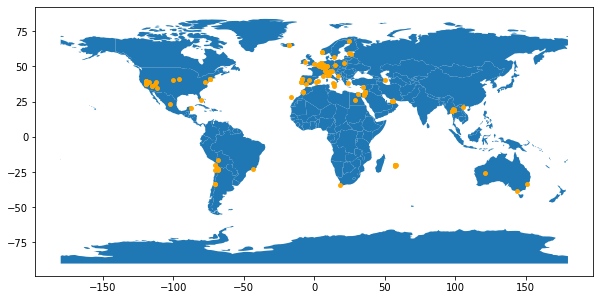

In [29]:
geometry = [Point(xy) for xy in zip(longs_btb, lats_btb)]
d = {'col1': map_cities_btb, 'geometry': geometry}
gdf = GeoDataFrame(d)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color="orange", markersize=15);

<b>.json Files Analysis for #travelbelgium</b> 

In [30]:
#travelbelgiumJSON
#make a dictionary with a list in it

lats_tb = []
longs_tb = []
map_cities_tb = []
tb_json_dict = {
    "Post ID":[],
    "Link": [],
    "User ID": [], 
    "Username": [], 
    "Full Name": [],
    "City": [],
    "Country": [],
    "Caption": [],
    "Number of Likes": [], 
    "Number of Comments": [],
    "Paid Partnership Status": [], 
    "Accessibility Caption": []}
#print(glob.glob ("#travelbelgium/*.json"))
for filename in glob.glob ("#travelbelgium/*.json"): 
    with open (filename) as jsonFile:
        data = json.loads (jsonFile.read ())
        #print(data ["node"]["id"]) #make an empty list for every id. fill the dictionary with the keys (id in that case) and value (empty list).
        tb_json_dict ["Post ID"].append(data ["node"]["id"])
        tb_json_dict ["Link"].append("https://www.instagram.com/p/" + str (data ["node"]["shortcode"]) + "/?hl=en")
        tb_json_dict ["User ID"].append(data ["node"]["owner"]["id"])
       
        if "iphone_struct" not in data ["node"]:
            tb_json_dict ["Username"].append("Non applicable")
            tb_json_dict ["Full Name"].append("Non applicable")
            tb_json_dict ["Country"].append("Non applicable")
            tb_json_dict ["City"].append("Non applicable")
            tb_json_dict ["Number of Comments"].append("Non applicable")
            tb_json_dict ["Paid Partnership Status"].append("Non applicable")
        else:
            tb_json_dict ["Full Name"].append(data ["node"]["iphone_struct"]["user"]["full_name"])
            tb_json_dict ["Username"].append(data ["node"]["iphone_struct"]["user"]["username"])
            tb_json_dict ["Number of Comments"].append(data ["node"]["iphone_struct"]["comment_count"])
            tb_json_dict ["Paid Partnership Status"].append(data ["node"]["iphone_struct"]["is_paid_partnership"])
            if "location" in data ["node"]["iphone_struct"]:
                location = data ["node"]["iphone_struct"]["location"]["name"]
                if "lat" in data ["node"]["iphone_struct"]["location"]:
                    lats_tb.append (data ["node"]["iphone_struct"]["location"]["lat"])
                    longs_tb.append (data ["node"]["iphone_struct"]["location"]["lng"])
                    map_cities_tb.append (location) 
                split_loc = location.split(",")
                if len(split_loc) == 1:
                    tb_json_dict ["City"].append(split_loc[0])
                    tb_json_dict ["Country"].append("Non applicable")
                else:
                    tb_json_dict ["City"].append(split_loc[0])
                    tb_json_dict ["Country"].append(split_loc[1])
            else:
                tb_json_dict ["City"].append("Non applicable")
                tb_json_dict ["Country"].append("Non applicable")
        Caption = data ["node"]["edge_media_to_caption"]["edges"][0]["node"]["text"]
        Caption = Caption.replace('\n', ' ')
        Caption = Caption.replace("\\'", "'")
        Caption = Caption.replace('\u2060', ' ')
        print (Caption)
        print ("/")
        tb_json_dict ["Caption"].append(Caption)
        tb_json_dict ["Number of Likes"].append(data ["node"]["edge_liked_by"]["count"])
        tb_json_dict ["Accessibility Caption"].append(data ["node"]["accessibility_caption"])

Photo talk 📷🌸  For this spring photo session, I used my Canon EF 50 mm f/1.8 STM lens for the first time this year.   I’m quite happy with the result and 100% recommend it to beginner photographers.   3 things to know about 50 mm lenses:   1. 50 mm lenses are fixed lenses, which means that the focus is not adjustable. In other words, you become the zoom! I found it quite intimidating at first, but it’s actually a great way to work on your angles without relying so much on the zoom.  2. Great for low-light photography and extra luminous pictures in general.   3. Great option for photographers on a budget. I got mine for around €120 euros, which is a real bargain for such quality.   For 2022, I have my eyes on several lenses, including a wide-angle one. If you have any lens recommendations, please drop them below 🙏⬇️   #brussel #belgië #ig_belgium #loving_belgium #bxlmabelle #europe_vacations  #houses_phototrip #springinbrussels #flowersinthecity #travelphotography #bruxellestagram #visi

In [31]:
print (tb_json_dict)

{'Post ID': ['2825712016435557532', '2825727641879236378', '2825739076414561660', '2825741234048498527', '2825745969426755269', '2825746328376024039', '2825786415914598154', '2825802653029140738', '2825804573895060532', '2825833217963267791', '2825833542719858211', '2825843422913560165', '2825848084027232185', '2825882454712384487', '2825886626501308203', '2825894975926041869', '2825898803547334620', '2825904579053361702', '2825938743489298543', '2825987730678863011', '2826063914756975212', '2826074169536530808', '2826087526507379435', '2826108476587125007', '2826148418105377873', '2826148715011165717', '2826163219283312791', '2826186640092234864', '2826189032540971548', '2826215857454303759', '2826229306499383020', '2826231791456215958', '2826239495151689429', '2826244174669760636', '2826302514183286572', '2826324446174074247', '2826332149256119263', '2826350137074267227', '2826350760079203273', '2826426784841650229', '2826435510848410823', '2826452422053618508', '2826457472861153929'

In [32]:
print (tb_json_dict["Caption"])

['Photo talk 📷🌸  For this spring photo session, I used my Canon EF 50 mm f/1.8 STM lens for the first time this year.   I’m quite happy with the result and 100% recommend it to beginner photographers.   3 things to know about 50 mm lenses:   1. 50 mm lenses are fixed lenses, which means that the focus is not adjustable. In other words, you become the zoom! I found it quite intimidating at first, but it’s actually a great way to work on your angles without relying so much on the zoom.  2. Great for low-light photography and extra luminous pictures in general.   3. Great option for photographers on a budget. I got mine for around €120 euros, which is a real bargain for such quality.   For 2022, I have my eyes on several lenses, including a wide-angle one. If you have any lens recommendations, please drop them below 🙏⬇️   #brussel #belgië #ig_belgium #loving_belgium #bxlmabelle #europe_vacations  #houses_phototrip #springinbrussels #flowersinthecity #travelphotography #bruxellestagram #vi

In [33]:
for Caption in tb_json_dict["Caption"]:
    Caption = Caption.replace('(\n)*', '')
    print (Caption)

Photo talk 📷🌸  For this spring photo session, I used my Canon EF 50 mm f/1.8 STM lens for the first time this year.   I’m quite happy with the result and 100% recommend it to beginner photographers.   3 things to know about 50 mm lenses:   1. 50 mm lenses are fixed lenses, which means that the focus is not adjustable. In other words, you become the zoom! I found it quite intimidating at first, but it’s actually a great way to work on your angles without relying so much on the zoom.  2. Great for low-light photography and extra luminous pictures in general.   3. Great option for photographers on a budget. I got mine for around €120 euros, which is a real bargain for such quality.   For 2022, I have my eyes on several lenses, including a wide-angle one. If you have any lens recommendations, please drop them below 🙏⬇️   #brussel #belgië #ig_belgium #loving_belgium #bxlmabelle #europe_vacations  #houses_phototrip #springinbrussels #flowersinthecity #travelphotography #bruxellestagram #visi

In [34]:
database_tb_json_dict = pd.DataFrame(tb_json_dict)
database_tb_json_dict

pd.set_option('display.max_rows', None)

In [35]:
database_tb_json_dict

,Post ID,Link,User ID,Username,Full Name,City,Country,Caption,Number of Likes,Number of Comments,Paid Partnership Status,Accessibility Caption
0,2825712016435557532,https://www.instagram.com/p/Cc28huRMbSc/?hl=en,3155119389,Non applicable,Non applicable,Non applicable,Non applicable,"Photo talk 📷🌸 For this spring photo session, ...",109,Non applicable,Non applicable,Photo by Alison ✨ Little Travel Moments in Bru...
1,2825727641879236378,https://www.instagram.com/p/Cc3AFGmNs8a/?hl=en,7718391687,Non applicable,Non applicable,Non applicable,Non applicable,Admirer et photographier les couchers de solei...,66,Non applicable,Non applicable,"Photo by Lara 🇧🇪 | Travel lover 🌍 in La Panne,..."
2,2825739076414561660,https://www.instagram.com/p/Cc3Crf1oV18/?hl=en,46861642540,Non applicable,Non applicable,Non applicable,Non applicable,📸 Shot with a #Canon #1D Mark IV & Canon #50mm...,12,Non applicable,Non applicable,"Photo by Antoine in Brussels, Belgium. May be ..."
3,2825741234048498527,https://www.instagram.com/p/Cc3DK5Sontf/?hl=en,261838150,Non applicable,Non applicable,Non applicable,Non applicable,I still don't know about the story with the ha...,11,Non applicable,Non applicable,"Photo by André S. on April 27, 2022. May be an..."
4,2825745969426755269,https://www.instagram.com/p/Cc3EPzdLG7F/?hl=en,2064536327,Non applicable,Non applicable,Non applicable,Non applicable,"When we're willing to show up, despite our ins...",586,Non applicable,Non applicable,"Photo by Sustainable Travel Blogger in Bruges,..."
5,2825746328376024039,https://www.instagram.com/p/Cc3EVBwN5vn/?hl=en,7321055973,Non applicable,Non applicable,Non applicable,Non applicable,"Back to the gallery at night? . ""I often thi...",136,Non applicable,Non applicable,Photo by Hendrik Stam in Galeries Royales Sain...
6,2825786415914598154,https://www.instagram.com/p/Cc3NcYLtr8K/?hl=en,4308794437,Non applicable,Non applicable,Non applicable,Non applicable,#Wallonie #Wallonia #tourismeBelgique #touri...,14,Non applicable,Non applicable,Photo by Sabrina Choupetta in Seneffe. May be ...
7,2825802653029140738,https://www.instagram.com/p/Cc3RIqLKIkC/?hl=en,50225428188,Non applicable,Non applicable,Non applicable,Non applicable,Centrum historische Gent . . . . . #gent #de...,48,Non applicable,Non applicable,Photo by Murat aslan in Centre historique de G...
8,2825804573895060532,https://www.instagram.com/p/Cc3RknHsGw0/?hl=en,9531722878,Non applicable,Non applicable,Non applicable,Non applicable,Lieve Gent * * * #lieve #rabot #sintantonius...,161,Non applicable,Non applicable,Photo by Kota Gent in Lieve. May be an image o...
9,2825833217963267791,https://www.instagram.com/p/Cc3YFb_MxbP/?hl=en,6132058488,Non applicable,Non applicable,Non applicable,Non applicable,##provinciewvl/#iedereenwestvlaams/#meerwestvl...,16,Non applicable,Non applicable,"Photo by Christine Beheyt on April 27, 2022. M..."


In [36]:
database_tb_json_dict.sort_values('Username')

,Post ID,Link,User ID,Username,Full Name,City,Country,Caption,Number of Likes,Number of Comments,Paid Partnership Status,Accessibility Caption
0,2825712016435557532,https://www.instagram.com/p/Cc28huRMbSc/?hl=en,3155119389,Non applicable,Non applicable,Non applicable,Non applicable,"Photo talk 📷🌸 For this spring photo session, ...",109,Non applicable,Non applicable,Photo by Alison ✨ Little Travel Moments in Bru...
23,2826108476587125007,https://www.instagram.com/p/Cc4Wq-jsikP/?hl=en,7321055973,Non applicable,Non applicable,Non applicable,Non applicable,"Don't forget to look up! . ""Make visible wha...",132,Non applicable,Non applicable,"Photo by Hendrik Stam in Brussels, Belgium. Ma..."
22,2826087526507379435,https://www.instagram.com/p/Cc4R6HRonrr/?hl=en,2238828127,Non applicable,Non applicable,Non applicable,Non applicable,#bruges #belgium #europe #travel #belgiumgram ...,262,Non applicable,Non applicable,"Photo by Jean Attard in Brugge, Belgium. May b..."
21,2826074169536530808,https://www.instagram.com/p/Cc4O3voIcl4/?hl=en,53091389162,Non applicable,Non applicable,Non applicable,Non applicable,Liverpool Villarreal #liverpool #villarreal #...,3,Non applicable,Non applicable,Photo by Spor Official in Liverpool. May be an...
20,2826063914756975212,https://www.instagram.com/p/Cc4MihHo6ps/?hl=en,25751721322,Non applicable,Non applicable,Non applicable,Non applicable,🍻 Don't forget our Guided Tours ! Belgian Bee...,2,Non applicable,Non applicable,"Photo by Bbct on April 27, 2022. May be an ima..."
19,2825987730678863011,https://www.instagram.com/p/Cc37N5KudSj/?hl=en,7321055973,Non applicable,Non applicable,Non applicable,Non applicable,Another point of view may lead to success. . ...,180,Non applicable,Non applicable,"Photo by Hendrik Stam in Warandepark, Brussel...."
18,2825938743489298543,https://www.instagram.com/p/Cc3wFCSsYBv/?hl=en,2115886298,Non applicable,Non applicable,Non applicable,Non applicable,#путешествия #travel #travelbelgium #traveleur...,16,Non applicable,Non applicable,Photo by Daria Chernikova in Louvain-la-Neuve....
16,2825898803547334620,https://www.instagram.com/p/Cc3m_1Uo-fc/?hl=en,14307887194,Non applicable,Non applicable,Non applicable,Non applicable,Centro de turismo - Visita Gante #visitgent #...,17,Non applicable,Non applicable,"Photo by @t4_b4s in Gante, Bélgica. May be an ..."
15,2825894975926041869,https://www.instagram.com/p/Cc3mIIkof0N/?hl=en,14307887194,Non applicable,Non applicable,Non applicable,Non applicable,La gente disfrutando del canal de Gante #visi...,12,Non applicable,Non applicable,"Photo by @t4_b4s in Gante, Bélgica. May be an ..."
14,2825886626501308203,https://www.instagram.com/p/Cc3kOokIy8r/?hl=en,14307887194,Non applicable,Non applicable,Non applicable,Non applicable,Iglesia de San Nicolás en Gante #visitgent #g...,18,Non applicable,Non applicable,"Photo by @t4_b4s in Gante, Bélgica. May be an ..."


<b>Language Detection for #travelbelgium</b> 

In [37]:
langs = []
for caption in database_tb_json_dict ['Caption']:
    langs.append (detect(caption))

In [38]:
database_tb_json_dict['Language'] = langs

In [39]:
database_tb_json_dict

,Post ID,Link,User ID,Username,Full Name,City,Country,Caption,Number of Likes,Number of Comments,Paid Partnership Status,Accessibility Caption,Language
0,2825712016435557532,https://www.instagram.com/p/Cc28huRMbSc/?hl=en,3155119389,Non applicable,Non applicable,Non applicable,Non applicable,"Photo talk 📷🌸 For this spring photo session, ...",109,Non applicable,Non applicable,Photo by Alison ✨ Little Travel Moments in Bru...,en
1,2825727641879236378,https://www.instagram.com/p/Cc3AFGmNs8a/?hl=en,7718391687,Non applicable,Non applicable,Non applicable,Non applicable,Admirer et photographier les couchers de solei...,66,Non applicable,Non applicable,"Photo by Lara 🇧🇪 | Travel lover 🌍 in La Panne,...",fr
2,2825739076414561660,https://www.instagram.com/p/Cc3Crf1oV18/?hl=en,46861642540,Non applicable,Non applicable,Non applicable,Non applicable,📸 Shot with a #Canon #1D Mark IV & Canon #50mm...,12,Non applicable,Non applicable,"Photo by Antoine in Brussels, Belgium. May be ...",en
3,2825741234048498527,https://www.instagram.com/p/Cc3DK5Sontf/?hl=en,261838150,Non applicable,Non applicable,Non applicable,Non applicable,I still don't know about the story with the ha...,11,Non applicable,Non applicable,"Photo by André S. on April 27, 2022. May be an...",en
4,2825745969426755269,https://www.instagram.com/p/Cc3EPzdLG7F/?hl=en,2064536327,Non applicable,Non applicable,Non applicable,Non applicable,"When we're willing to show up, despite our ins...",586,Non applicable,Non applicable,"Photo by Sustainable Travel Blogger in Bruges,...",en
5,2825746328376024039,https://www.instagram.com/p/Cc3EVBwN5vn/?hl=en,7321055973,Non applicable,Non applicable,Non applicable,Non applicable,"Back to the gallery at night? . ""I often thi...",136,Non applicable,Non applicable,Photo by Hendrik Stam in Galeries Royales Sain...,en
6,2825786415914598154,https://www.instagram.com/p/Cc3NcYLtr8K/?hl=en,4308794437,Non applicable,Non applicable,Non applicable,Non applicable,#Wallonie #Wallonia #tourismeBelgique #touri...,14,Non applicable,Non applicable,Photo by Sabrina Choupetta in Seneffe. May be ...,en
7,2825802653029140738,https://www.instagram.com/p/Cc3RIqLKIkC/?hl=en,50225428188,Non applicable,Non applicable,Non applicable,Non applicable,Centrum historische Gent . . . . . #gent #de...,48,Non applicable,Non applicable,Photo by Murat aslan in Centre historique de G...,nl
8,2825804573895060532,https://www.instagram.com/p/Cc3RknHsGw0/?hl=en,9531722878,Non applicable,Non applicable,Non applicable,Non applicable,Lieve Gent * * * #lieve #rabot #sintantonius...,161,Non applicable,Non applicable,Photo by Kota Gent in Lieve. May be an image o...,nl
9,2825833217963267791,https://www.instagram.com/p/Cc3YFb_MxbP/?hl=en,6132058488,Non applicable,Non applicable,Non applicable,Non applicable,##provinciewvl/#iedereenwestvlaams/#meerwestvl...,16,Non applicable,Non applicable,"Photo by Christine Beheyt on April 27, 2022. M...",af


<b>Map for #travelbelgium</b> 

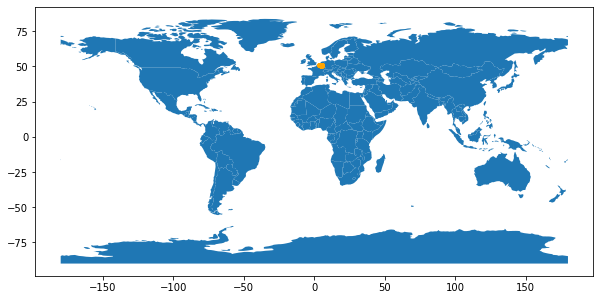

In [40]:
geometry_tb = [Point(xy) for xy in zip(longs_tb, lats_tb)]
d = {'col1': map_cities_tb, 'geometry': geometry_tb}
gdf = GeoDataFrame(d)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color="orange", markersize=15);

<b>Emoji Analysis</b><br> 
Note: For this part, code in "How to Create a Python Regex to Extract Emoji" by Elias Dabbas was used. Retrieved from https://www.kaggle.com/code/eliasdabbas/how-to-create-a-python-regex-to-extract-emoji.

In [41]:
with open('emoji-test.txt', 'rt', encoding="utf8") as file:
    emoji_raw = file.read()
print(emoji_raw[:2800])

# emoji-test.txt
# Date: 2020-09-12, 22:19:50 GMT
# © 2020 Unicode®, Inc.
# Unicode and the Unicode Logo are registered trademarks of Unicode, Inc. in the U.S. and other countries.
# For terms of use, see http://www.unicode.org/terms_of_use.html
#
# Emoji Keyboard/Display Test Data for UTS #51
# Version: 13.1
#
# For documentation and usage, see http://www.unicode.org/reports/tr51
#
# This file provides data for testing which emoji forms should be in keyboards and which should also be displayed/processed.
# Format: code points; status # emoji name
#     Code points — list of one or more hex code points, separated by spaces
#     Status
#       component           — an Emoji_Component,
#                             excluding Regional_Indicators, ASCII, and non-Emoji.
#       fully-qualified     — a fully-qualified emoji (see ED-18 in UTS #51),
#                             excluding Emoji_Component
#       minimally-qualified — a minimally-qualified emoji (see ED-18a in UTS #51)
#      

In [42]:
EmojiEntry = namedtuple('EmojiEntry', ['codepoint', 'status', 'emoji', 'name', 'group', 'sub_group'])

In [43]:
E_regex = re.compile(r' ?E\d+\.\d+ ') # remove the pattern E<digit(s)>.<digit(s)>
emoji_entries = []

for line in emoji_raw.splitlines()[32:]:  # skip the explanation lines
    if line == '# Status Counts':  # the last line in the document
        break
    if 'subtotal:' in line:  # these are lines showing statistics about each group, not needed
        continue
    if not line:  # if it's a blank line
        continue
    if line.startswith('#'):  # these lines contain group and/or sub-group names
        if '# group:' in line:
            group = line.split(':')[-1].strip()
        if '# subgroup:' in line:
            subgroup = line.split(':')[-1].strip()
    if group == 'Component':  # skin tones, and hair types, skip, as mentioned above
        continue
    if re.search('^[0-9A-F]{3,}', line):  # if the line starts with a hexadecimal number (an emoji code point)
        # here we define all the elements that will go into emoji entries
        codepoint = line.split(';')[0].strip()  # in some cases it is one and in others multiple code points
        status = line.split(';')[-1].split()[0].strip() # status: fully-qualified, minimally-qualified, unqualified
        if line[-1] == '#':
            # The special case where the emoji is actually the hash sign "#". In this case manually assign the emoji
            if 'fully-qualified' in line:
                emoji = '#️⃣'
            else:
                emoji = '#⃣'  # they look the same, but are actually different 
        else:  # the default case
            emoji = line.split('#')[-1].split()[0].strip()  # the emoji character itself
        if line[-1] == '#':  # (the special case)
            name = '#'
        else:  # extract the emoji name
            split_hash = line.split('#')[1]
            rm_capital_E = E_regex.split(split_hash)[1]
            name = rm_capital_E
        templine = EmojiEntry(codepoint=codepoint,
                              status=status,
                              emoji=emoji,
                              name=name,
                              group=group,
                              sub_group=subgroup)
        emoji_entries.append(templine)

In [44]:
emoji_dict = {x.emoji: x for x in emoji_entries}

In [45]:
multi_codepoint_emoji = []

for code in [c.codepoint.split() for c in emoji_entries]:
    if len(code) > 1:
        # turn to a hexadecimal number zfilled to 8 zeros e.g: '\U0001F44D'
        hexified_codes = [r'\U' + x.zfill(8) for x in code]  
        hexified_codes = ''.join(hexified_codes)  # join all hexadecimal components 
        multi_codepoint_emoji.append(hexified_codes)

# sorting by length in decreasing order is extremely important as demonstrated above
multi_codepoint_emoji_sorted = sorted(multi_codepoint_emoji, key=len, reverse=True)

# join with a "|" to function as an "or" in the regex
multi_codepoint_emoji_joined = '|'.join(multi_codepoint_emoji_sorted)  
multi_codepoint_emoji_joined[:400]  # sample

'\\U0001F9D1\\U0001F3FB\\U0000200D\\U00002764\\U0000FE0F\\U0000200D\\U0001F48B\\U0000200D\\U0001F9D1\\U0001F3FC|\\U0001F9D1\\U0001F3FB\\U0000200D\\U00002764\\U0000FE0F\\U0000200D\\U0001F48B\\U0000200D\\U0001F9D1\\U0001F3FD|\\U0001F9D1\\U0001F3FB\\U0000200D\\U00002764\\U0000FE0F\\U0000200D\\U0001F48B\\U0000200D\\U0001F9D1\\U0001F3FE|\\U0001F9D1\\U0001F3FB\\U0000200D\\U00002764\\U0000FE0F\\U0000200D\\U0001F48B\\U0000200D\\U0001F9D1\\U0001F'

In [46]:
single_codepoint_emoji = []

for code in [c.codepoint.split() for c in emoji_entries]:
    if len(code) == 1:
        single_codepoint_emoji.append(code[0])

In [47]:
def get_ranges(nums):
    """Reduce a list of integers to tuples of local maximums and minimums.

    :param nums: List of integers.
    :return ranges: List of tuples showing local minimums and maximums
    """
    nums = sorted(nums)
    lows = [nums[0]]
    highs = []
    if nums[1] - nums[0] > 1:
        highs.append(nums[0])
    for i in range(1, len(nums)-1):
        if (nums[i] - nums[i-1]) > 1:
            lows.append(nums[i])
        if (nums[i + 1] - nums[i]) > 1:
            highs.append(nums[i])
    highs.append(nums[-1])
    if len(highs) > len(lows):
        lows.append(highs[-1])
    return [(l, h) for l, h in zip(lows, highs)]

In [48]:
# We first convert single_codepoint_emoji to integers to make calculations easier
single_codepoint_emoji_int = [int(x, base=16) for x in single_codepoint_emoji]
single_codepoint_emoji_ranges = get_ranges(single_codepoint_emoji_int)
single_codepoint_emoji_ranges[:10]

[(169, 169),
 (174, 174),
 (8252, 8252),
 (8265, 8265),
 (8482, 8482),
 (8505, 8505),
 (8596, 8601),
 (8617, 8618),
 (8986, 8987),
 (9000, 9000)]

In [49]:
single_codepoint_emoji_raw = r''  # start with an empty raw string
for code in single_codepoint_emoji_ranges:
    if code[0] == code[1]:  # in this case make it a single hexadecimal character
        temp_regex =  r'\U' + hex(code[0])[2:].zfill(8)
        single_codepoint_emoji_raw += temp_regex
    else:
        # otherwise create a character range, joined by '-'
        temp_regex = '-'.join([r'\U' + hex(code[0])[2:].zfill(8), r'\U' + hex(code[1])[2:].zfill(8)])
        single_codepoint_emoji_raw += temp_regex

single_codepoint_emoji_raw[:100]  # sample

'\\U000000a9\\U000000ae\\U0000203c\\U00002049\\U00002122\\U00002139\\U00002194-\\U00002199\\U000021a9-\\U000021'

In [50]:
all_emoji_regex = re.compile(multi_codepoint_emoji_joined + '|' +  r'[' + single_codepoint_emoji_raw + r']')
all_emoji_regex.pattern[:500], all_emoji_regex.pattern[-500:]

('\\U0001F9D1\\U0001F3FB\\U0000200D\\U00002764\\U0000FE0F\\U0000200D\\U0001F48B\\U0000200D\\U0001F9D1\\U0001F3FC|\\U0001F9D1\\U0001F3FB\\U0000200D\\U00002764\\U0000FE0F\\U0000200D\\U0001F48B\\U0000200D\\U0001F9D1\\U0001F3FD|\\U0001F9D1\\U0001F3FB\\U0000200D\\U00002764\\U0000FE0F\\U0000200D\\U0001F48B\\U0000200D\\U0001F9D1\\U0001F3FE|\\U0001F9D1\\U0001F3FB\\U0000200D\\U00002764\\U0000FE0F\\U0000200D\\U0001F48B\\U0000200D\\U0001F9D1\\U0001F3FF|\\U0001F9D1\\U0001F3FC\\U0000200D\\U00002764\\U0000FE0F\\U0000200D\\U0001F48B\\U0000200D\\U0001F9D1\\U0001',
 '0001f5e3\\U0001f5e8\\U0001f5ef\\U0001f5f3\\U0001f5fa-\\U0001f64f\\U0001f680-\\U0001f6c5\\U0001f6cb-\\U0001f6d2\\U0001f6d5-\\U0001f6d7\\U0001f6e0-\\U0001f6e5\\U0001f6e9\\U0001f6eb-\\U0001f6ec\\U0001f6f0\\U0001f6f3-\\U0001f6fc\\U0001f7e0-\\U0001f7eb\\U0001f90c-\\U0001f93a\\U0001f93c-\\U0001f945\\U0001f947-\\U0001f978\\U0001f97a-\\U0001f9af\\U0001f9b4-\\U0001f9cb\\U0001f9cd-\\U0001f9ff\\U0001fa70-\\U0001fa74\\U0001fa78-\\U0001fa7a\\U0001fa80-

In [51]:
all_emoji_regex.findall(' '.join([x.emoji for x in emoji_entries])).__len__()

4581

In [52]:
count = 0
found_emoji = set()
for line in emoji_raw.splitlines()[30:]:
    match = all_emoji_regex.findall(line)
    if match:
        if len(match) > 1:
            break
        count += 1
        found_emoji.add(match[0])
        temp_name = [x.name for x in emoji_entries if x.emoji == match[0]][0]
        assert temp_name in line

count, found_emoji.__len__()

(4581, 4581)

In [53]:
with open('emoji_df.csv', 'wt', encoding="utf8") as file:
    print('emoji;name;group;sub_group;codepoints', file=file)
    for i, em in enumerate(emoji_entries):
        print(f"{em.emoji};{em.name};{em.group};{em.sub_group};{em.codepoint}", file=file)

In [54]:
pd.options.display.max_columns = None
#preset for pandas if you want to see all the rows instead of the default one
pd.set_option('display.max_rows', None)

emoji_df = pd.read_csv('emoji_df.csv', sep=';')
emoji_df.to_csv('emoji_df.csv', index=False)
emoji_df = pd.read_csv('emoji_df.csv')
emoji_df[:35]

,emoji,name,group,sub_group,codepoints
0,😀,grinning face,Smileys & Emotion,face-smiling,1F600
1,😃,grinning face with big eyes,Smileys & Emotion,face-smiling,1F603
2,😄,grinning face with smiling eyes,Smileys & Emotion,face-smiling,1F604
3,😁,beaming face with smiling eyes,Smileys & Emotion,face-smiling,1F601
4,😆,grinning squinting face,Smileys & Emotion,face-smiling,1F606
5,😅,grinning face with sweat,Smileys & Emotion,face-smiling,1F605
6,🤣,rolling on the floor laughing,Smileys & Emotion,face-smiling,1F923
7,😂,face with tears of joy,Smileys & Emotion,face-smiling,1F602
8,🙂,slightly smiling face,Smileys & Emotion,face-smiling,1F642
9,🙃,upside-down face,Smileys & Emotion,face-smiling,1F643


<b>Emoji Analysis for #belgiantravelblogger</b> 

In [55]:
database_btb_json_dict_emoji_freq = (adv.word_frequency(database_btb_json_dict['Caption'],
                                                        regex=all_emoji_regex.pattern))
database_btb_json_dict_emoji_freq.head(500)

,word,abs_freq
0,🇹🇭,30
1,🐘,29
2,✨,28
3,📍,27
4,👌,25
5,😉,18
6,☀️,13
7,🤩,12
8,🇬🇧,12
9,🌸,12


In [56]:
database_btb_json_dict_emoji_freq['name'] = [emoji_dict[word].name if word != '️' else '' for word in database_btb_json_dict_emoji_freq['word']]
database_btb_json_dict_emoji_freq['group'] = [emoji_dict[word].group if word != '️' else '' for word in database_btb_json_dict_emoji_freq['word']]
database_btb_json_dict_emoji_freq['sub_group'] = [emoji_dict[word].sub_group if word != '️' else '' for word in database_btb_json_dict_emoji_freq['word']]
database_btb_json_dict_emoji_freq[:500]

,word,abs_freq,name,group,sub_group
0,🇹🇭,30,flag: Thailand,Flags,country-flag
1,🐘,29,elephant,Animals & Nature,animal-mammal
2,✨,28,sparkles,Activities,event
3,📍,27,round pushpin,Objects,office
4,👌,25,OK hand,People & Body,hand-fingers-partial
5,😉,18,winking face,Smileys & Emotion,face-smiling
6,☀️,13,sun,Travel & Places,sky & weather
7,🤩,12,star-struck,Smileys & Emotion,face-affection
8,🇬🇧,12,flag: United Kingdom,Flags,country-flag
9,🌸,12,cherry blossom,Animals & Nature,plant-flower


In [57]:
(database_btb_json_dict_emoji_freq
 .groupby('group')
 .agg({'abs_freq': 'sum'})
 .sort_values('abs_freq', ascending=False)
 .style.format({'abs_freq': '{:,.0f}'}))

,abs_freq
group,
Smileys & Emotion,142
Flags,92
Animals & Nature,87
People & Body,69
Travel & Places,66
Objects,51
Activities,32
Food & Drink,30
Symbols,29


<b>Emoji Analysis for #travelbelgium</b> 

In [58]:
database_tb_json_dict_emoji_freq = (adv.word_frequency(database_tb_json_dict['Caption'],
                                          regex=all_emoji_regex.pattern))
database_tb_json_dict_emoji_freq.head(500)

,word,abs_freq
0,〰️,168
1,🇧🇪,27
2,➖,6
3,▪️,6
4,🔸,6
5,🔺,6
6,📍,5
7,😍,5
8,📸,5
9,🔹,5


In [59]:
database_tb_json_dict_emoji_freq['name'] = [emoji_dict[word].name if word != '️' else '' for word in database_tb_json_dict_emoji_freq['word']]
database_tb_json_dict_emoji_freq['group'] = [emoji_dict[word].group if word != '️' else '' for word in database_tb_json_dict_emoji_freq['word']]
database_tb_json_dict_emoji_freq['sub_group'] = [emoji_dict[word].sub_group if word != '️' else '' for word in database_tb_json_dict_emoji_freq['word']]
database_tb_json_dict_emoji_freq[:500]

,word,abs_freq,name,group,sub_group
0,〰️,168,wavy dash,Symbols,punctuation
1,🇧🇪,27,flag: Belgium,Flags,country-flag
2,➖,6,minus,Symbols,math
3,▪️,6,black small square,Symbols,geometric
4,🔸,6,small orange diamond,Symbols,geometric
5,🔺,6,red triangle pointed up,Symbols,geometric
6,📍,5,round pushpin,Objects,office
7,😍,5,smiling face with heart-eyes,Smileys & Emotion,face-affection
8,📸,5,camera with flash,Objects,light & video
9,🔹,5,small blue diamond,Symbols,geometric


In [60]:
(database_tb_json_dict_emoji_freq
 .groupby('group')
 .agg({'abs_freq': 'sum'})
 .sort_values('abs_freq', ascending=False)
 .style.format({'abs_freq': '{:,.0f}'}))

,abs_freq
group,
Symbols,203
Flags,28
Smileys & Emotion,26
Objects,14
People & Body,8
Food & Drink,7
Travel & Places,5
Activities,4
Animals & Nature,4
